In [1]:
import tprstats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def plot_actual_predicted_PI(linmod, MyData, col_name):
    # Extract the actual values
    Y = MyData[col_name].values
    Observation = np.arange(1, len(MyData) + 1)
    
    # Get predictions and prediction intervals
    X = sm.add_constant(MyData.drop(columns=[col_name]))
    Pred_and_PI = linmod.result().get_prediction(X).summary_frame(alpha=0.05)
    Predicted = Pred_and_PI['mean']
    Lower = Pred_and_PI['obs_ci_lower']
    Upper = Pred_and_PI['obs_ci_upper']
    
    # Determine the y-axis limits
    ymax = max(Upper+.5)
    ymin = min(Lower-.5)
    
    # Plot actual values, predicted values, and prediction intervals
    plt.figure(figsize=(10, 6))
    plt.scatter(Observation, Y, color='black', label='Actual', s=20)
    plt.plot(Observation, Y, color='black')
    plt.plot(Observation, Predicted, color='red', label='Predicted')
    plt.plot(Observation, Upper, color='blue', label='95% PI')
    plt.plot(Observation, Lower, color='blue')
    
    plt.ylim(ymin, ymax)
    plt.xlabel('Observation')
    plt.ylabel(col_name)
    plt.title('Actual (black), Predicted (red), and 95% PI (blue)')
    plt.legend()
    plt.show()

# Example usage:
# Assuming linmod is a fitted statsmodels OLS model and MyData is a pandas DataFrame
# plot_actual_predicted_PI(linmod, MyData, 'col_name')

In [3]:
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)



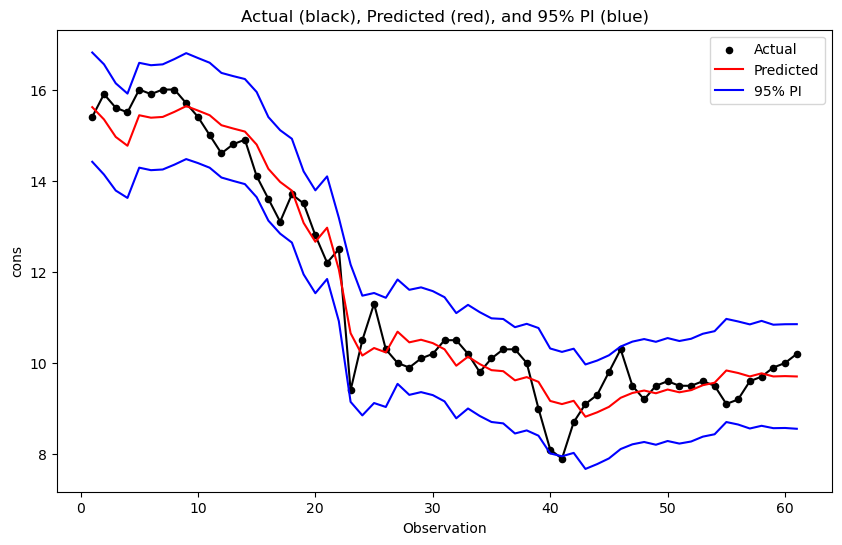

In [4]:
plot_actual_predicted_PI(model_coffee_ts, coffee_data, "cons")

In [5]:
def plot_log_actual_predicted_PI(linmod, MyData, col_name):
    import numpy as np
    # Extract the actual values
    Y = MyData[col_name].values
    Observation = np.arange(1, len(MyData) + 1)
    
    # Get predictions and prediction intervals
    X = sm.add_constant(MyData.drop(columns=[col_name]))
    Pred_and_PI = linmod.result().get_prediction(X).summary_frame(alpha=0.05)
    Predicted = np.exp(Pred_and_PI['mean'])
    Lower = np.exp(Pred_and_PI['obs_ci_lower'])
    Upper = np.exp(Pred_and_PI['obs_ci_upper'])
    
    # Determine the y-axis limits
    ymax = max(Upper+1)
    ymin = min(Lower-1)
    
    # Plot actual values, predicted values, and prediction intervals
    plt.figure(figsize=(10, 6))
    plt.scatter(Observation, Y, color='black', label='Actual', s=20)
    plt.plot(Observation, Y, color='black')
    plt.plot(Observation, Predicted, color='red', label='Predicted')
    plt.plot(Observation, Upper, color='blue', label='95% PI')
    plt.plot(Observation, Lower, color='blue')
    
    plt.ylim(ymin, ymax)
    plt.xlabel('Observation')
    plt.ylabel(col_name)
    plt.title('Actual (black), Predicted (red), and 95% PI (blue)')
    plt.legend()
    plt.show()

# Example usage:
# Assuming linmod is a fitted statsmodels OLS model and MyData is a pandas DataFrame
# plot_actual_predicted_PI(linmod, MyData, 'col_name')

In [6]:
model_log_coffee_ts = tprstats.model(name = "ts", formula='log(cons) ~ log(rpcarb) + log(rpcinc) + log(rpcofe)', data=coffee_data)

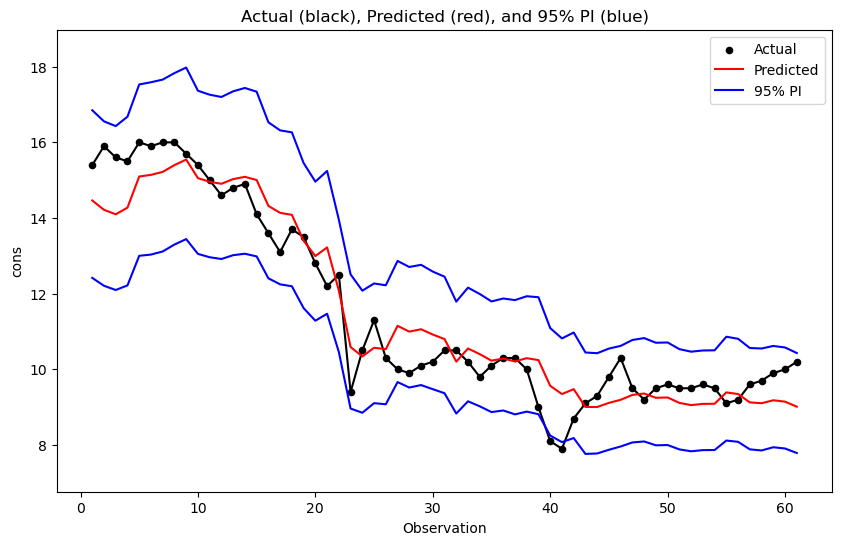

In [ ]:
plot_log_actual_predicted_PI(model_log_coffee_ts, coffee_data,"cons")

In [8]:
tprstats._plot_actual_fitted(model_coffee_ts, coffee_data, "cons")

TypeError: plot_actual_predicted_PI() missing 1 required positional argument: 'data'